**Clustering methods**, one of the most useful unsupervised ML methods, used to find similarity & relationship patterns among data samples. After that, they cluster those samples into groups having similarity based on features. Clustering determines the intrinsic grouping among the present unlabeled data, that’s why it is important.
The Scikit-learn library have sklearn.cluster to perform clustering of unlabeled data. Under this module scikit-leran have the following clustering methods:

### KMeans

This algorithm computes the centroids and iterates until it finds optimal centroid. It requires the number of clusters to be specified that’s why it assumes that they are already known. The main logic of this algorithm is to cluster the data separating samples in n number of groups of equal variances by minimizing the criteria known as the inertia. The number of clusters identified by algorithm is represented by ‘K.
Scikit-learn have sklearn.cluster.KMeans module to perform K-Means clustering. While computing cluster centers and value of inertia, the parameter named sample_weight allows sklearn.cluster.KMeans module to assign more weight to some samples.


**Affinity Propagation**

This algorithm is based on the concept of ‘message passing’ between different pairs of samples until convergence. It does not require the number of clusters to be specified before running the algorithm. The algorithm has a time complexity of the order 𝑂(𝑁2𝑇), which is the biggest disadvantage of it.
Scikit-learn have sklearn.cluster.AffinityPropagation module to perform Affinity Propagation clustering.

**Mean Shift**

This algorithm mainly discovers blobs in a smooth density of samples. It assigns the datapoints to the clusters iteratively by shifting points towards the highest density of datapoints. Instead of relying on a parameter named bandwidth dictating the size of the region to search through, it automatically sets the number of clusters.
Scikit-learn have sklearn.cluster.MeanShift module to perform Mean Shift clustering.

**Spectral Clustering**

Before clustering, this algorithm basically uses the eigenvalues i.e. spectrum of the similarity matrix of the data to perform dimensionality reduction in fewer dimensions. The use of this algorithm is not advisable when there are large number of clusters.Scikit-learn have sklearn.cluster.SpectralClustering module to perform Spectral clustering.

**Hierarchical Clustering**

This algorithm builds nested clusters by merging or splitting the clusters successively. This cluster hierarchy is represented as dendrogram i.e. tree. It falls into following two categories:

**Agglomerative hierarchical algorithms:** In this kind of hierarchical algorithm, every data point is treated like a single cluster. It then successively agglomerates the pairs of clusters. This uses the bottom-up approach.

**Divisive hierarchical algorithms:** In this hierarchical algorithm, all data points are treated as one big cluster. In this the process of clustering involves dividing, by using top-down approach, the one big cluster into various small clusters.

Scikit-learn have sklearn.cluster.AgglomerativeClustering module to perform Agglomerative Hierarchical clustering.

**DBSCAN**

It stands for “Density-based spatial clustering of applications with noise”. This algorithm is based on the intuitive notion of “clusters” & “noise” that clusters are dense regions of the lower density in the data space, separated by lower density regions of data points.
Scikit-learn have sklearn.cluster.DBSCAN module to perform DBSCAN clustering. There are two important parameters namely min_samples and eps used by this algorithm to define dense.
Higher value of parameter min_samples or lower value of the parameter eps will give an indication about the higher density of data points which is necessary to form a cluster.

**OPTICS**

It stands for “Ordering points to identify the clustering structure”. This algorithm also finds density-based clusters in spatial data. It’s basic working logic is like DBSCAN.
It addresses a major weakness of DBSCAN algorithm-the problem of detecting meaningful clusters in data of varying density-by ordering the points of the database in such a way that spatially closest points become neighbors in the ordering.
Scikit-learn have sklearn.cluster.OPTICS module to perform OPTICS clustering.

**BIRCH**

It stands for Balanced iterative reducing and clustering using hierarchies. It is used to perform hierarchical clustering over large data sets. It builds a tree named CFT i.e. Characteristics Feature Tree, for the given data.
The advantage of CFT is that the data nodes called CF (Characteristics Feature) nodes holds the necessary information for clustering which further prevents the need to hold the entire input data in memory.



**K-Means Clustering on Scikit-learn Digit dataset**

In this example, we will apply K-means clustering on digits dataset. This algorithm will identify similar digits without using the original label information. Implementation is done on Jupyter notebook.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

This output shows that digit dataset is having 1797 samples with 64 features.
Now, perform the K-Means clustering as follows:

In [2]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10, 64)

This output shows that K-means clustering created 10 clusters with 64 features.

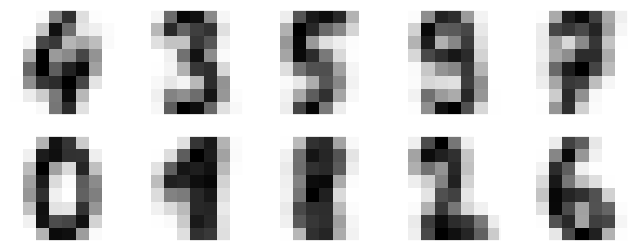

In [4]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Next, the Python script below will match the learned cluster labels (by K-Means) with the true labels found in them:

In [5]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

<ipython-input-5-56962d36160d>:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


We can also check the accuracy with the help of the below mentioned command.

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

### CLUSTERING PERFORMACE EVALUATION

There are various functions with the help of which we can evaluate the performance of clustering algorithms.
Following are some important and mostly used functions given by the Scikit-learn for evaluating clustering performance:

#### **Adjusted Rand Index**

Rand Index is a function that computes a similarity measure between two clustering. For this computation rand index considers all pairs of samples and counting pairs that are assigned in the similar or different clusters in the predicted and true clustering. Afterwards, the raw Rand Index score is ‘adjusted for chance’ into the Adjusted Rand Index score by using the following formula: 𝐴𝑑𝑗𝑢𝑠𝑡𝑒𝑑 𝑅𝐼 = (𝑅𝐼−𝐸𝑥𝑝𝑒𝑐𝑡𝑒𝑑_𝑅𝐼)/(𝑚𝑎𝑥(𝑅𝐼)− 𝐸𝑥𝑝𝑒𝑐𝑡𝑒𝑑_𝑅𝐼)
It has two parameters namely labels_true, which is ground truth class labels, and labels_pred, which are clusters label to evaluate.

In [7]:
from sklearn.metrics.cluster import adjusted_rand_score
labels_true = [0, 0, 1, 1, 1, 1]
labels_pred = [0, 0, 2, 2, 3, 3]
adjusted_rand_score(labels_true, labels_pred)

0.4444444444444444

Perfect labeling would be scored 1 and bad labelling or independent labelling is scored 0 or negative.

#### Mutual Information Based Score

Mutual Information is a function that computes the agreement of the two assignments. It ignores the permutations. There are following versions available:

**Normalized Mutual Information (NMI)**
Scikit learn have sklearn.metrics.normalized_mutual_info_score module.

In [8]:
from sklearn.metrics.cluster import normalized_mutual_info_score
labels_true = [0, 0, 1, 1, 1, 1]
labels_pred = [0, 0, 2, 2, 3, 3]
normalized_mutual_info_score (labels_true, labels_pred)

0.7336804366512113

#### **Adjusted Mutual Information (AMI)**

Scikit learn have sklearn.metrics.adjusted_mutual_info_score module.

In [9]:
from sklearn.metrics.cluster import adjusted_mutual_info_score
labels_true = [0, 0, 1, 1, 1, 1]
labels_pred = [0, 0, 2, 2, 3, 3]
adjusted_mutual_info_score (labels_true, labels_pred)

0.6153846153846159

#### **Fowlkes-Mallows Score**

The Fowlkes-Mallows function measures the similarity of two clustering of a set of points. It may be defined as the geometric mean of the pairwise precision and recall.

Mathematically, 𝐹𝑀𝑆=𝑇𝑃√(𝑇𝑃+𝐹𝑃)(𝑇𝑃+𝐹𝑁)


Here, TP = True Positive; number of pair of points belonging to the same clusters in true as well as predicted labels both.
FP = False Positive; number of pair of points belonging to the same clusters in true labels but not in the predicted labels.
FN = False Negative; number of pair of points belonging to the same clusters in the predicted labels but not in the true labels.
The Scikit learn has sklearn.metrics.fowlkes_mallows_score module:

In [11]:
from sklearn.metrics.cluster import fowlkes_mallows_score
labels_true = [0, 0, 1, 1, 1, 1]
labels_pred = [0, 0, 2, 2, 3, 3]

fowlkes_mallows_score (labels_true, labels_pred)

0.6546536707079771

#### **Silhouette Coefficient**

The Silhouette function will compute the mean Silhouette Coefficient of all samples using the mean intra-cluster distance and the mean nearest-cluster distance for each sample.

Mathematically,
𝑆 =(𝑏−𝑎)/𝑚𝑎𝑥(𝑎,𝑏)


Here, a is intra-cluster distance.
and, b is mean nearest-cluster distance.
The Scikit learn have sklearn.metrics.silhouette_score module:

In [13]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn import datasets
import numpy as np
from sklearn.cluster import KMeans

dataset = datasets.load_iris()
X = dataset.data
y = dataset.target

kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans_model.labels_
silhouette = silhouette_score(X, labels, metric='euclidean')

print("Silhouette Score:", silhouette)

Silhouette Score: 0.5528190123564095


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### Contingency Matrix

This matrix will report the intersection cardinality for every trusted pair of (true, predicted). Confusion matrix for classification problems is a square contingency matrix.
The Scikit learn have sklearn.metrics.contingency_matrix module.



In [14]:
from sklearn.metrics.cluster import contingency_matrix
x = ["a", "a", "a", "b", "b", "b"]
y = [1, 1, 2, 0, 1, 2]
contingency_matrix(x, y)

array([[0, 2, 1],
       [1, 1, 1]])

The first row of above output shows that among three samples whose true cluster is “a”, none of them is in 0, two of the are in 1 and 1 is in 2. On the other hand, second row shows that among three samples whose true cluster is “b”, 1 is in 0, 1 is in 1 and 1 is in 2.